In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
import math
import matplotlib.dates as mdates

In [ ]:
dict = ['GOOG', 'AAPL','MSFT','AMZN','NVDA', 'TSLA']
valid_Input = False

In [ ]:
import numpy as np

In [ ]:
# User ticker selection
while not valid_Input:
    x = 0
    val = -1
    tickerSelection = "|| "
    for tickers in dict:
        tickerSelection += tickers + " [" + str(x) + "] || "
        x += 1
    tickerSelection += "\n"
    try:
        val = int(input("Please enter the number for the ticker you would like to track: \n" + tickerSelection))
    except:
        print("Please input integer only...")
    # print("Yo"val)
    if val >= 0 and val <= len(dict) -1:
        valid_Input = True
    else:
        print("Invalid input please try again \n\n")

Please enter the number for the ticker you would like to track: 
|| GOOG [0] || AAPL [1] || MSFT [2] || AMZN [3] || NVDA [4] || TSLA [5] || 
2


In [ ]:
ticker =  dict[val]
start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()
df = yf.download(ticker, start , end)



[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()
df = df.drop('Adj Close',axis=1)

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2019-01-02,99.550003,101.750000,98.940002,101.120003,35329300
1,2019-01-03,100.099998,100.190002,97.199997,97.400002,42579100
2,2019-01-04,99.720001,102.510002,98.930000,101.930000,44060600
3,2019-01-07,101.639999,103.269997,100.980003,102.059998,35656100
4,2019-01-08,103.040001,103.970001,101.709999,102.800003,31514400


In [ ]:
timestamps_buy = []
timestamps_sell = []

In [ ]:
import pandas as pd
import numpy as np


def pso_buy_sell(df):
    # Define the objective function
    def objective(x):
        # Compute the moving averages
        short_ma = df['Close'].rolling(window=int(x[0])).mean()
        long_ma = df['Close'].rolling(window=int(x[1])).mean()

        # Compute the buy/sell signal
        buy_signal = (short_ma > long_ma).astype(int)

        # Compute the profit
        profit = np.sum((buy_signal.shift(1) * (df['Close'] - df['Close'].shift(1))))

        return -profit

    # Define the PSO parameters
    num_particles = 10
    num_dimensions = 2
    max_iterations = 50
    c1 = 2.0
    c2 = 2.0
    w = 0.7

    # Initialize the particles
    particles = np.random.rand(num_particles, num_dimensions) * 100.0

    # Initialize the velocities
    velocities = np.zeros((num_particles, num_dimensions))

    # Initialize the personal best positions and values
    personal_best_positions = particles.copy()
    personal_best_values = np.zeros(num_particles)

    for i in range(num_particles):
        personal_best_values[i] = objective(particles[i])

    # Initialize the global best position and value
    global_best_position = particles[personal_best_values.argmin()].copy()
    global_best_value = personal_best_values.min()

    # Run the PSO algorithm
    for iteration in range(max_iterations):
        # Update the velocities and positions
        for i in range(num_particles):
            r1 = np.random.rand(num_dimensions)
            r2 = np.random.rand(num_dimensions)
            velocities[i] = w * velocities[i] + c1 * r1 * (personal_best_positions[i] - particles[i]) + c2 * r2 * (global_best_position - particles[i])
            particles[i] = particles[i] + velocities[i]

            # Apply bounds to the positions
            particles[i] = np.maximum(particles[i], np.array([1, 1]))
            particles[i] = np.minimum(particles[i], np.array([len(df), len(df)]))

        # Evaluate the objective function
        for i in range(num_particles):
            value = objective(particles[i])

            # Update the personal best position and value
            if value < personal_best_values[i]:
                personal_best_positions[i] = particles[i].copy()
                personal_best_values[i] = value

                # Update the global best position and value
                if value < global_best_value:
                    global_best_position = particles[i].copy()
                    global_best_value = value

    # Compute the moving averages with the best parameters
    short_ma = df['Close'].rolling(window=int(global_best_position[0])).mean()
    long_ma = df['Close'].rolling(window=int(global_best_position[1])).mean()


    buy_signal = (short_ma > long_ma).astype(int)


    for i in range(len(buy_signal)):
        if buy_signal[i] == 1:
            print('Buy on', df['Date'][i])
            timestamps_buy.append(df['Date'][i])
        else:
            print('Sell on', df['Date'][i])
            timestamps_sell.append(df['Date'][i])


In [ ]:
pso_buy_sell(df)

Sell on 2019-01-02 00:00:00
Sell on 2019-01-03 00:00:00
Sell on 2019-01-04 00:00:00
Sell on 2019-01-07 00:00:00
Sell on 2019-01-08 00:00:00
Sell on 2019-01-09 00:00:00
Sell on 2019-01-10 00:00:00
Sell on 2019-01-11 00:00:00
Sell on 2019-01-14 00:00:00
Sell on 2019-01-15 00:00:00
Sell on 2019-01-16 00:00:00
Sell on 2019-01-17 00:00:00
Sell on 2019-01-18 00:00:00
Sell on 2019-01-22 00:00:00
Sell on 2019-01-23 00:00:00
Sell on 2019-01-24 00:00:00
Sell on 2019-01-25 00:00:00
Sell on 2019-01-28 00:00:00
Sell on 2019-01-29 00:00:00
Sell on 2019-01-30 00:00:00
Sell on 2019-01-31 00:00:00
Sell on 2019-02-01 00:00:00
Sell on 2019-02-04 00:00:00
Sell on 2019-02-05 00:00:00
Sell on 2019-02-06 00:00:00
Sell on 2019-02-07 00:00:00
Sell on 2019-02-08 00:00:00
Sell on 2019-02-11 00:00:00
Sell on 2019-02-12 00:00:00
Sell on 2019-02-13 00:00:00
Sell on 2019-02-14 00:00:00
Sell on 2019-02-15 00:00:00
Sell on 2019-02-19 00:00:00
Sell on 2019-02-20 00:00:00
Sell on 2019-02-21 00:00:00
Sell on 2019-02-22 0

In [ ]:
print(len(timestamps_buy))
print(len(timestamps_sell))

724
360


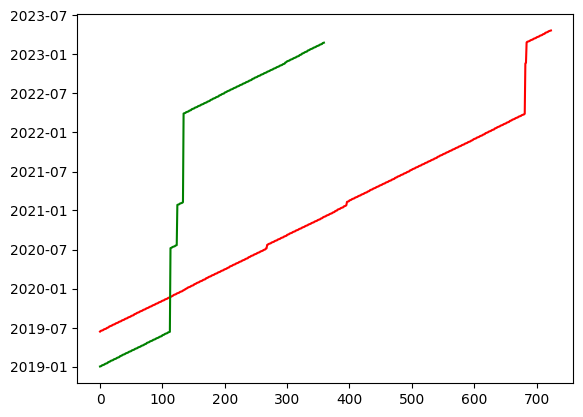

In [ ]:
plt.plot(timestamps_buy,color='r')
plt.plot(timestamps_sell,color='g')

In [ ]:
df1 = pd.read_csv("")